In [1]:
import pandas as pd 

import pmdarima as pm
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Crude oil.csv')
df

,Date,DJSI-US,food inflation index (cpi),D3,D4,D5,D6,Crude
0,2/3/2011,103.93,NaN,NaN,NaN,NaN,NaN,101.69
1,2/4/2011,104.10,NaN,NaN,NaN,NaN,NaN,99.43
2,2/7/2011,104.66,NaN,NaN,0.92,0.64,0.01,99.44
3,2/8/2011,105.06,NaN,NaN,NaN,NaN,NaN,99.25
4,2/9/2011,104.82,NaN,NaN,NaN,NaN,NaN,100.16
...,...,...,...,...,...,...,...,...
2192,12/24/2019,249.38,NaN,NaN,NaN,NaN,NaN,69.26
2193,12/26/2019,251.86,NaN,NaN,NaN,NaN,NaN,69.26
2194,12/27/2019,253.88,NaN,NaN,NaN,NaN,NaN,68.91
2195,12/30/2019,253.19,NaN,0.79,0.37,0.49,0.02,68.30


In [7]:
df = pd.read_csv('Crude oil.csv')

cols_to_interpolate = ['D3','D4','D5','D6']

for col in cols_to_interpolate:
    df[col] = df[col].interpolate(method='polynomial', order=2, limit_direction = 'both').bfill().ffill()

# Only forward fill
df['food inflation index (cpi)'] = df['food inflation index (cpi)'].interpolate(method='polynomial', 
                                                                                order=2, limit_direction = 'forward').ffill()

# DF
df

,Date,DJSI-US,food inflation index (cpi),D3,D4,D5,D6,Crude
0,2/3/2011,103.93,NaN,1.200000,0.920000,0.640000,0.010000,101.69
1,2/4/2011,104.10,NaN,1.200000,0.920000,0.640000,0.010000,99.43
2,2/7/2011,104.66,NaN,1.200000,0.920000,0.640000,0.010000,99.44
3,2/8/2011,105.06,NaN,1.200000,0.896773,0.634694,0.009998,99.25
4,2/9/2011,104.82,NaN,1.200000,0.886159,0.625040,0.009997,100.16
...,...,...,...,...,...,...,...,...
2192,12/24/2019,249.38,99.68,0.965763,0.415734,0.476455,0.071251,69.26
2193,12/26/2019,251.86,99.68,0.929350,0.400979,0.481941,0.058335,69.26
2194,12/27/2019,253.88,99.68,0.870763,0.385734,0.486455,0.041251,68.91
2195,12/30/2019,253.19,99.68,0.790000,0.370000,0.490000,0.020000,68.30


In [8]:
# Drop NAs
df = df.dropna()

# DF
df

,Date,DJSI-US,food inflation index (cpi),D3,D4,D5,D6,Crude
18,3/1/2011,103.32,92.110000,1.200000,0.854260,0.531345,0.010102,113.34
19,3/3/2011,104.83,92.127173,1.200000,0.876076,0.507671,0.010250,114.42
20,3/4/2011,103.99,92.144182,1.200000,0.907353,0.482661,0.010273,115.71
21,3/7/2011,103.20,92.161027,1.200000,0.930000,0.470000,0.010000,116.58
22,3/8/2011,104.00,92.177709,1.200000,0.944016,0.469689,0.009432,112.32
...,...,...,...,...,...,...,...,...
2192,12/24/2019,249.38,99.680000,0.965763,0.415734,0.476455,0.071251,69.26
2193,12/26/2019,251.86,99.680000,0.929350,0.400979,0.481941,0.058335,69.26
2194,12/27/2019,253.88,99.680000,0.870763,0.385734,0.486455,0.041251,68.91
2195,12/30/2019,253.19,99.680000,0.790000,0.370000,0.490000,0.020000,68.30


#### Before interpolation

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

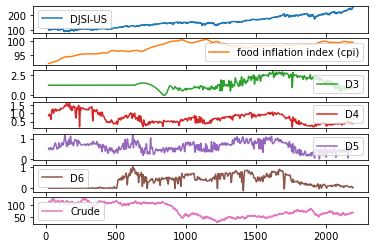

In [9]:
df.plot(subplots=True)

#### After interpolation

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

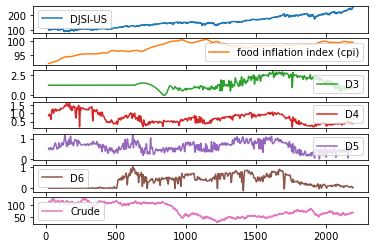

In [10]:
df.plot(subplots=True)

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')
df

C:\Users\hembroua\AppData\Local\Temp/ipykernel_18952/4147477037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,Date,DJSI-US,food inflation index (cpi),D3,D4,D5,D6,Crude
18,2011-03-01,103.32,92.110000,1.200000,0.854260,0.531345,0.010102,113.34
19,2011-03-03,104.83,92.127173,1.200000,0.876076,0.507671,0.010250,114.42
20,2011-03-04,103.99,92.144182,1.200000,0.907353,0.482661,0.010273,115.71
21,2011-03-07,103.20,92.161027,1.200000,0.930000,0.470000,0.010000,116.58
22,2011-03-08,104.00,92.177709,1.200000,0.944016,0.469689,0.009432,112.32
...,...,...,...,...,...,...,...,...
2192,2019-12-24,249.38,99.680000,0.965763,0.415734,0.476455,0.071251,69.26
2193,2019-12-26,251.86,99.680000,0.929350,0.400979,0.481941,0.058335,69.26
2194,2019-12-27,253.88,99.680000,0.870763,0.385734,0.486455,0.041251,68.91
2195,2019-12-30,253.19,99.680000,0.790000,0.370000,0.490000,0.020000,68.30


In [26]:
TARGET = 'D6'
y = df[TARGET]
y

18      0.010102
19      0.010250
20      0.010273
21      0.010000
22      0.009432
          ...   
2192    0.071251
2193    0.058335
2194    0.041251
2195    0.020000
2196    0.020000
Name: D6, Length: 2179, dtype: float64

In [27]:
# Load the data and split it into separate pieces
train_len = int(df.shape[0] * 0.9)
train_data, test_data = df[:train_len], df[train_len:]

y_train = train_data[TARGET].values
y_test = test_data[TARGET].values

print(f"{train_len} train samples")
print(f"{df.shape[0] - train_len} test samples")

1961 train samples
218 test samples


In [28]:
from pmdarima.arima import ndiffs

kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


In [29]:
auto = pm.auto_arima(y_train, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13214.638, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7799.824, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10495.897, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10070.421, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7801.815, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-12569.803, Time=1.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13217.494, Time=0.60 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-12027.123, Time=1.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-13175.729, Time=0.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-13238.066, Time=0.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-13215.906, Time=0.70 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-13235.144, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-13218.228, Time=2.82 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-13214.861, Time=1.24 sec
 ARIMA(

In [30]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = auto

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)
    
    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)
    
print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

Mean squared error: 6.5862360260377605e-06
SMAPE: 2.767965091592859


In [31]:
preds = pd.DataFrame(forecasts, index = test_data.index)
actuals = pd.DataFrame(y_test, index = test_data.index)
res = pd.concat([actuals, preds], axis = 1)
res.columns = ['Actuals', 'Predicted']
res['Delta'] = ((res['Actuals'] - res['Predicted'])/res['Predicted']) * 100
res

,Actuals,Predicted,Delta
1979,0.139792,0.142904,-2.177675
1980,0.137672,0.132543,3.869904
1981,0.140000,0.139988,0.008351
1982,0.146776,0.145632,0.785524
1983,0.158000,0.157472,0.335225
...,...,...,...
2192,0.071251,0.072456,-1.663172
2193,0.058335,0.060036,-2.834089
2194,0.041251,0.045291,-8.920060
2195,0.020000,0.024451,-18.203336


In [32]:
auto2 = pm.auto_arima(y, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14892.585, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8879.910, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11876.376, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11400.840, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8881.910, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14177.063, Time=1.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14895.454, Time=0.46 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-13573.686, Time=1.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-14849.210, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-14917.745, Time=0.72 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-14893.700, Time=0.39 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-14914.926, Time=1.02 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-14895.537, Time=3.64 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-14892.745, Time=0.60 sec
 ARIMA(

In [33]:
forecasts = auto2.predict(n_periods=15)

In [34]:
forecast_indexes = pd.date_range(start=df.index[-1], periods=16)
forecast_indexes = forecast_indexes[1:]
forecast_indexes

DatetimeIndex(['1970-01-02 00:00:00.000002196',
               '1970-01-03 00:00:00.000002196',
               '1970-01-04 00:00:00.000002196',
               '1970-01-05 00:00:00.000002196',
               '1970-01-06 00:00:00.000002196',
               '1970-01-07 00:00:00.000002196',
               '1970-01-08 00:00:00.000002196',
               '1970-01-09 00:00:00.000002196',
               '1970-01-10 00:00:00.000002196',
               '1970-01-11 00:00:00.000002196',
               '1970-01-12 00:00:00.000002196',
               '1970-01-13 00:00:00.000002196',
               '1970-01-14 00:00:00.000002196',
               '1970-01-15 00:00:00.000002196',
               '1970-01-16 00:00:00.000002196'],
              dtype='datetime64[ns]', freq='D')

In [35]:
future_forecasts = pd.DataFrame(forecasts, index = forecast_indexes)
future_forecasts

,0
1970-01-02 00:00:00.000002196,0.038630
1970-01-03 00:00:00.000002196,0.071854
1970-01-04 00:00:00.000002196,0.114881
1970-01-05 00:00:00.000002196,0.150484
1970-01-06 00:00:00.000002196,0.167860
1970-01-07 00:00:00.000002196,0.164985
1970-01-08 00:00:00.000002196,0.147372
1970-01-09 00:00:00.000002196,0.124469
1970-01-10 00:00:00.000002196,0.105476
1970-01-11 00:00:00.000002196,0.096183


In [36]:
new_preds = pd.concat([preds, future_forecasts])
new_preds.columns = ['Actuals']

final_results = pd.concat([actuals, new_preds], axis = 1)
final_results.columns = ['Actuals', 'Predicted']
final_results['Delta'] = ((final_results['Actuals'] - final_results['Predicted'])/final_results['Predicted']) * 100
final_results.tail(50)

C:\opt\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:2955: RuntimeWarning: '<' not supported between instances of 'Timestamp' and 'int', sort order is undefined for incomparable objects
  return left.union(right, sort=sort)


,Actuals,Predicted,Delta
2162,0.080000,0.080994,-1.227844
2163,0.075284,0.076352,-1.398991
2164,0.072372,0.073120,-1.022694
2165,0.070774,0.070726,0.068369
2166,0.070000,0.069930,0.100203
2167,0.070050,0.069812,0.339976
2168,0.070923,0.070843,0.112101
2169,0.072280,0.072287,-0.009730
2170,0.072086,0.073685,-2.170538
2171,0.070000,0.070329,-0.467686


In [37]:
df.to_csv('final_results.csv', index = False, header=True)